# 3-layer neural network (one hidden layer)
### This part has solution to question 4 to 5


In [126]:
# Import Python libraries
import numpy as np
import matplotlib.pyplot as plt

## Neural Nets Model


In [127]:
class LogisticRegression:
    """
    Implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, output_dim, hidden_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
            hidden_dim: Number of hidden nodes
        """
        
        self.theta1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)       
        self.bias1 = np.zeros((1, hidden_dim))
        
        self.theta2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim) 
        self.bias2 = np.zeros((1, output_dim))
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z = np.dot(X,self.theta1) + self.bias1
        a = np.tanh(z)
        z2 = np.dot(a, self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss

    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z = np.dot(X,self.theta1) + self.bias1
        a = np.tanh(z)
        z2 = np.dot(a, self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions

    #--------------------------------------------------------------------------
   
    def fit(self,X,y,num_epochs,lr=0.01):
    
        #Learns model parameters to fit the data.
     
        
        for epoch in range(0, num_epochs):

            # Forward propagation
            z = np.dot(X, self.theta1) + self.bias1
            a = np.tanh(z)
            z2 = np.dot(a, self.theta2) + self.bias2
            exp_z2 = np.exp(z2)
            softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)                                                        
                                                                                            
            # Backpropagation
            beta = np.zeros_like(softmax_scores)
            one_hot_y = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y[i, y[i]] = 1
            beta2 = softmax_scores - one_hot_y
            
            # Compute gradients of model parameters
            dtheta2 = np.dot(a.T, beta2)
            dbias2 = np.sum(beta2, axis = 0, keepdims=True) 
            beta = np.dot(beta2, self.theta2.T) * (1 - np.power(a, 2))
            dtheta1 = np.dot(X.T, beta)                                   
            dbias1 = np.sum(beta, axis = 0)
        
            # Gradient descent parameter update
            self.theta1 -= lr * dtheta1
            self.bias1  -= lr * dbias1
            self.theta2 -= lr * dtheta2
            self.bias2  -= lr * dbias2
        
        return 0


In [128]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, alpha = 0.05)
    plt.show()

## Train the model on different learning rates

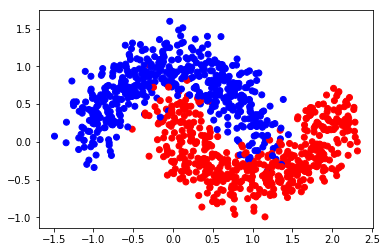

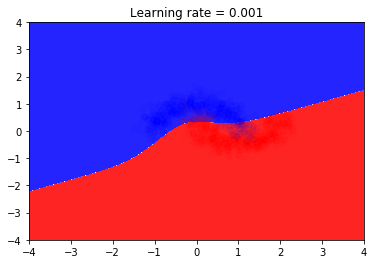

ACCURACY:  0.915
CONFUSION MATRIX: 
 [[ 456.   41.]
 [  44.  459.]]
0.226113186044


In [137]:
X1 = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',')
y1 = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap=plt.cm.bwr)
plt.show()
input_dim = np.shape(X1)[1]
output_dim = np.max(y1) + 1
logreg = LogisticRegression(input_dim, output_dim, 4)
logreg.fit(X1,y1,1000,lr=0.001)
plt.title("Learning rate = 0.001")
plot_decision_boundary(logreg, X1, y1)
acc1 = 0
y_pred1 = logreg.predict(X1)
con_mat1 = np.zeros((output_dim, output_dim))
for i in range(len(y_pred1)):
    con_mat1[y_pred1[i], y1[i]] += 1
    if y1[i] == y_pred1[i]:
        acc1 += 1
acc1 = acc1/len(y_pred1)
print ('ACCURACY: ', acc1)
print ('CONFUSION MATRIX: \n', con_mat1)
cost = logreg.compute_cost(X1, y1)
print(cost)

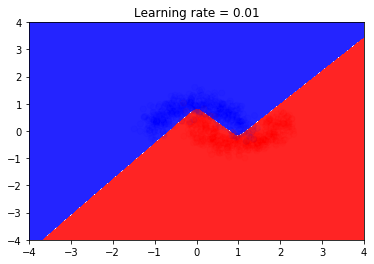

ACCURACY:  0.962
CONFUSION MATRIX: 
 [[ 475.   13.]
 [  25.  487.]]
0.117480714659


In [130]:
X2 = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',')
y2 = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
plt.title("Learning rate = 0.01")
logreg.fit(X2,y2,1000,lr=0.01)
plot_decision_boundary(logreg, X2, y2)
acc2 = 0
y_pred2 = logreg.predict(X2)
con_mat2 = np.zeros((output_dim, output_dim))
for i in range(len(y_pred2)):
    con_mat2[y_pred2[i], y2[i]] += 1
    if y2[i] == y_pred2[i]:
        acc2 += 1
acc2 = acc2/len(y_pred2)
print ('ACCURACY: ', acc2)
print ('CONFUSION MATRIX: \n', con_mat2)
cost2 = logreg.compute_cost(X2, y2)
print(cost2)

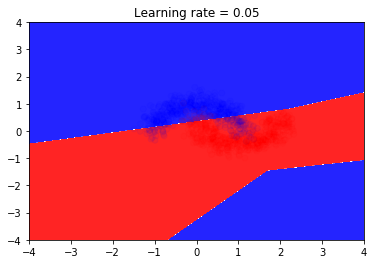

ACCURACY:  0.864
CONFUSION MATRIX: 
 [[ 396.   32.]
 [ 104.  468.]]
13.2193036529


In [153]:
X4 = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',')
y4 = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
plt.title("Learning rate = 0.05")
logreg.fit(X4,y4,1000,lr=0.05)
plot_decision_boundary(logreg, X4, y4)
acc4 = 0
y_pred4 = logreg.predict(X4)
con_mat4 = np.zeros((output_dim, output_dim))
for i in range(len(y_pred4)):
    con_mat4[y_pred4[i], y4[i]] += 1
    if y4[i] == y_pred4[i]:
        acc4 += 1
acc4 = acc4/len(y_pred4)
print ('ACCURACY: ', acc4)
print ('CONFUSION MATRIX: \n', con_mat4)
cost4 = logreg.compute_cost(X4, y4)
print(cost4)

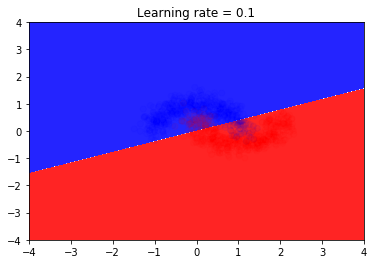

ACCURACY:  0.869
CONFUSION MATRIX: 
 [[ 443.   74.]
 [  57.  426.]]
18.2699667109


In [139]:
X3 = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',')
y3 = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
plt.title("Learning rate = 0.1")
logreg.fit(X3,y3,1000,lr=0.1)
plot_decision_boundary(logreg, X3, y3)
acc3 = 0
y_pred3 = logreg.predict(X3)
con_mat3 = np.zeros((output_dim, output_dim))
for i in range(len(y_pred3)):
    con_mat3[y_pred3[i], y3[i]] += 1
    if y3[i] == y_pred3[i]:
        acc3 += 1
acc3 = acc3/len(y_pred3)
print ('ACCURACY: ', acc3)
print ('CONFUSION MATRIX: \n', con_mat3)
cost3 = logreg.compute_cost(X3, y3)
print(cost3)

## Train the model on different number of nodes

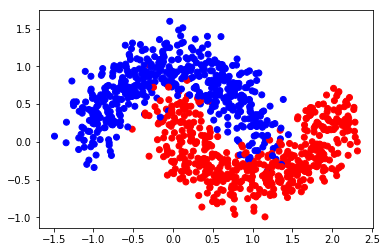

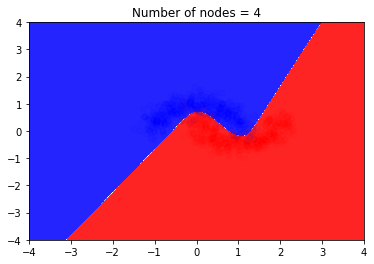

ACCURACY:  0.965
CONFUSION MATRIX: 
 [[ 483.   18.]
 [  17.  482.]]
0.084192621542


In [133]:
X1 = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',')
y1 = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap=plt.cm.bwr)
plt.show()
input_dim = np.shape(X1)[1]
output_dim = np.max(y1) + 1
logreg = LogisticRegression(input_dim, output_dim, 4)
logreg.fit(X1,y1,1000,lr=0.001)
plt.title("Number of nodes = 4")
plot_decision_boundary(logreg, X1, y1)
acc1 = 0
y_pred1 = logreg.predict(X1)
con_mat1 = np.zeros((output_dim, output_dim))
for i in range(len(y_pred1)):
    con_mat1[y_pred1[i], y1[i]] += 1
    if y1[i] == y_pred1[i]:
        acc1 += 1
acc1 = acc1/len(y_pred1)
print ('ACCURACY: ', acc1)
print ('CONFUSION MATRIX: \n', con_mat1)
cost = logreg.compute_cost(X1, y1)
print(cost)

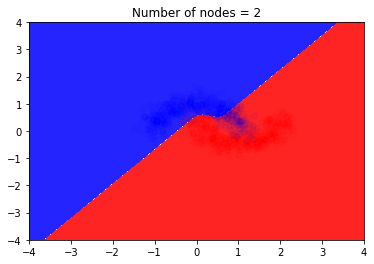

ACCURACY:  0.87
CONFUSION MATRIX: 
 [[ 387.   17.]
 [ 113.  483.]]
0.300656097729


In [134]:
X5 = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',')
y5 = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
logreg = LogisticRegression(input_dim, output_dim, 2)
logreg.fit(X5,y5,1000,lr=0.001)
plt.title("Number of nodes = 2")
plot_decision_boundary(logreg, X5, y5)
acc5 = 0
y_pred5 = logreg.predict(X5)
con_mat5 = np.zeros((output_dim, output_dim))
for i in range(len(y_pred5)):
    con_mat5[y_pred5[i], y5[i]] += 1
    if y5[i] == y_pred5[i]:
        acc5 += 1
acc5 = acc5/len(y_pred5)
print ('ACCURACY: ', acc5)
print ('CONFUSION MATRIX: \n', con_mat5)
cost5 = logreg.compute_cost(X5, y5)
print(cost5)

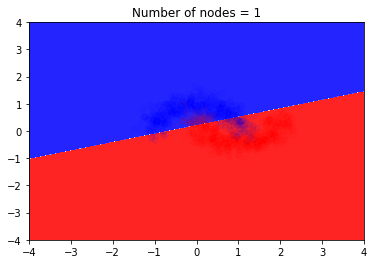

ACCURACY:  0.87
CONFUSION MATRIX: 
 [[ 422.   52.]
 [  78.  448.]]
0.301918673512


In [135]:
logreg = LogisticRegression(input_dim, output_dim, 1)
logreg.fit(X1,y1,1000,lr=0.001)
plt.title("Number of nodes = 1")
plot_decision_boundary(logreg, X1, y1)
acc1 = 0
y_pred1 = logreg.predict(X1)
con_mat1 = np.zeros((output_dim, output_dim))
for i in range(len(y_pred1)):
    con_mat1[y_pred1[i], y1[i]] += 1
    if y1[i] == y_pred1[i]:
        acc1 += 1
acc1 = acc1/len(y_pred1)
print ('ACCURACY: ', acc1)
print ('CONFUSION MATRIX: \n', con_mat1)
cost1 = logreg.compute_cost(X1, y1)
print(cost1)

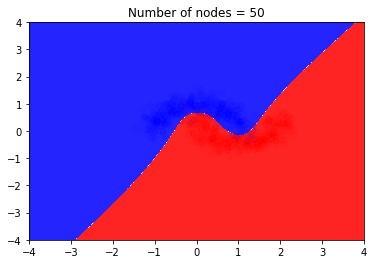

ACCURACY:  0.967
CONFUSION MATRIX: 
 [[ 484.   17.]
 [  16.  483.]]
0.301918673512


In [136]:
X6 = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',')
y6 = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
logreg6 = LogisticRegression(input_dim, output_dim, 50)
logreg6.fit(X6,y6,1000,lr=0.001)
plt.title("Number of nodes = 50")
plot_decision_boundary(logreg6, X6, y6)
acc6 = 0
y_pred6 = logreg6.predict(X6)
con_mat6 = np.zeros((output_dim, output_dim))
for i in range(len(y_pred6)):
    con_mat6[y_pred6[i], y6[i]] += 1
    if y6[i] == y_pred6[i]:
        acc6 += 1
acc6 = acc6/len(y_pred6)
print ('ACCURACY: ', acc6)
print ('CONFUSION MATRIX: \n', con_mat6)
cost6 = logreg.compute_cost(X6, y6)
print(cost6)